# Оглавление
1. [Подготовка данных](#Шаг_1)
2. [Обучение и проверка модели](#Шаг_2)
3. [Подготовка к расчёту прибыли](#Шаг_3)
4. [Расчёт прибыли и рисков](#Шаг_4)

<a name="Шаг_1"></a>

# 1. Подготовка данных

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [141]:
df_0 = pd.read_csv('geo_data_0.csv')

In [142]:
df_1 = pd.read_csv('geo_data_1.csv')

In [143]:
df_2 = pd.read_csv('geo_data_2.csv')

In [144]:
df_0.shape

(100000, 5)

In [145]:
df_1.shape

(100000, 5)

In [146]:
df_2.shape

(100000, 5)

In [147]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков нет

In [148]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков нет

In [149]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков нет

In [150]:
df_0.head(2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


In [151]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Нет отрицательных значений product

In [152]:
df_1.head(2)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


In [153]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Нет отрицательных значений product

In [154]:
df_2.head(2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


In [155]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Нет отрицательных значений product

In [156]:
df_0 = df_0.drop('id', axis = 1)

In [157]:
df_1 = df_1.drop('id', axis = 1)

In [158]:
df_2 = df_2.drop('id', axis = 1)

Колонку id считаю не влияющей ни на что. Убрал

In [159]:
features_0 = df_0.drop('product', axis = 1)

In [160]:
target_0 = df_0['product']

In [161]:
features_1 = df_1.drop('product', axis = 1)

In [162]:
target_1 = df_1['product']

In [163]:
features_2 = df_2.drop('product', axis = 1)

In [164]:
target_2 = df_2['product']

Выделил целевой признак

In [165]:
def hist(data, bins):
    column = data.columns
    for i in column:
        display('Значения столбца', i)
        display('гистограмма')
        plt.hist(data[i], bins = bins)
        plt.show()
        display('боксплот')
        plt.boxplot(data[i])
        plt.show()

<font color='brown'> 
Ф-ия для гистограмм и боксплот
</font>

In [166]:
def corr(data):
    column = data.columns
    for i in column:
        display('зависимость между product и {}'.format(i))
        display(data[i].corr(data['product']))

<font color='brown'> 
Ф-ия для кореляции
</font>

'Значения столбца'

'f0'

'гистограмма'

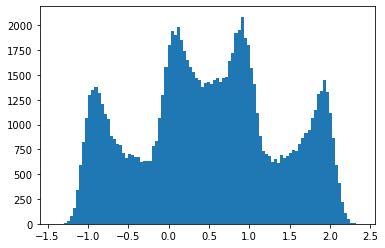

'боксплот'

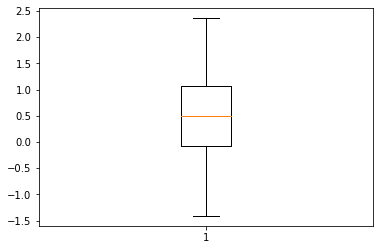

'Значения столбца'

'f1'

'гистограмма'

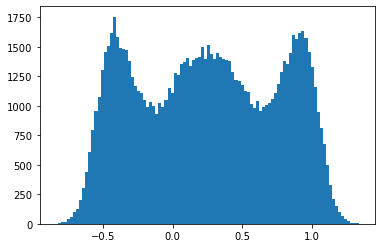

'боксплот'

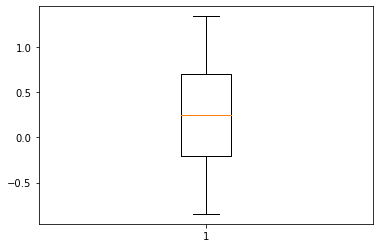

'Значения столбца'

'f2'

'гистограмма'

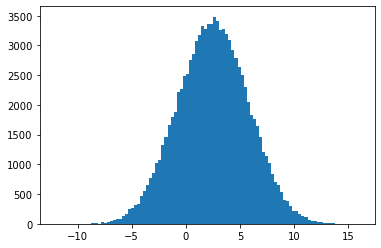

'боксплот'

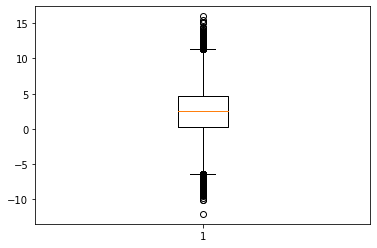

'Значения столбца'

'product'

'гистограмма'

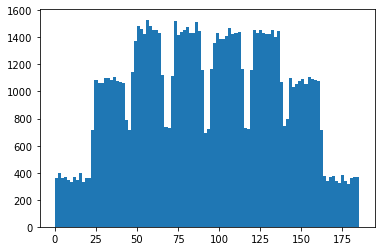

'боксплот'

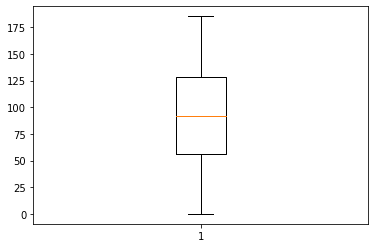

In [167]:
hist(df_0, 100)

In [168]:
corr(df_0)

'зависимость между product и f0'

0.14353635093189254

'зависимость между product и f1'

-0.19235576281513295

'зависимость между product и f2'

0.48366328692615257

'зависимость между product и product'

0.9999999999999999

Геоданные из региона 'geo_data_0'


Распределения нормальны, выбросы есть только в значениях столбца f2  (в пределах нормы)

Значение зависимости выше 0,5 не подмимается. Следовательно зависимость слабая или очень слабая.


'Значения столбца'

'f0'

'гистограмма'

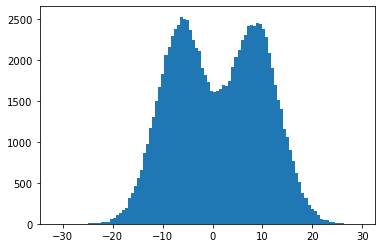

'боксплот'

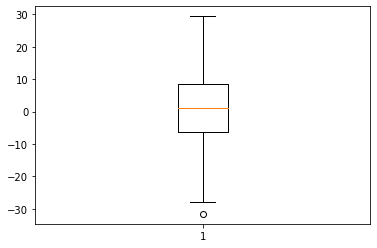

'Значения столбца'

'f1'

'гистограмма'

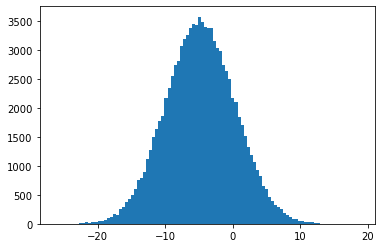

'боксплот'

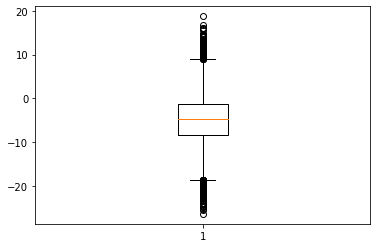

'Значения столбца'

'f2'

'гистограмма'

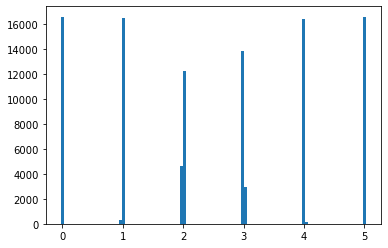

'боксплот'

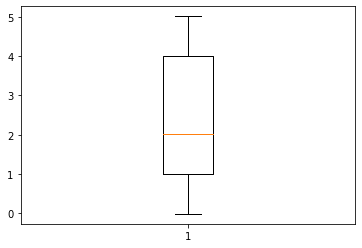

'Значения столбца'

'product'

'гистограмма'

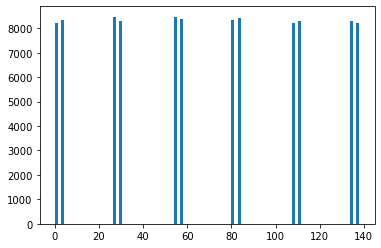

'боксплот'

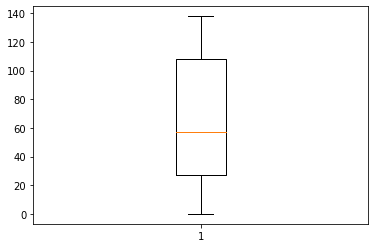

In [169]:
hist(df_1, 100)

In [170]:
corr(df_1)

'зависимость между product и f0'

-0.03049053056437569

'зависимость между product и f1'

-0.010154931786466249

'зависимость между product и f2'

0.9993969704906692

'зависимость между product и product'

1.0

Геоданные из региона 'geo_data_1'


Распределения нормальны, кроме f2 и product. выбросы есть только в значениях столбца f1  (в пределах нормы)

Значение зависимости поднимается выше 0,5 в одном случае product и f2.

'Значения столбца'

'f0'

'гистограмма'

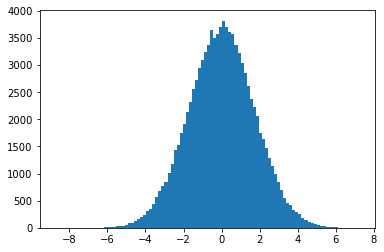

'боксплот'

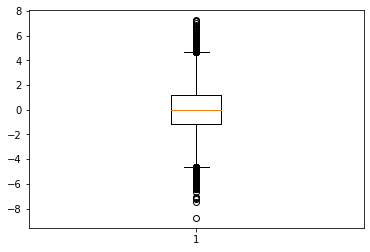

'Значения столбца'

'f1'

'гистограмма'

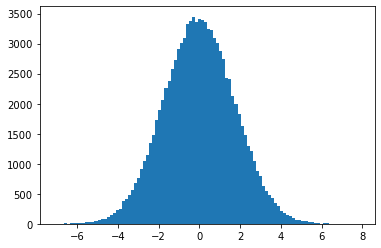

'боксплот'

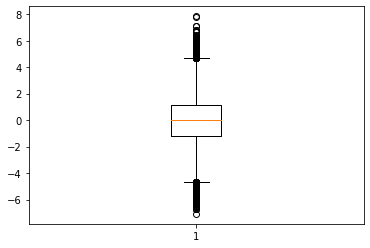

'Значения столбца'

'f2'

'гистограмма'

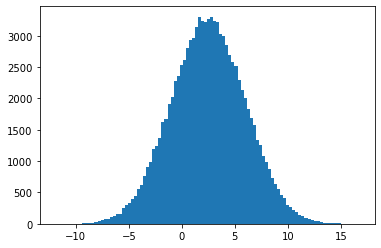

'боксплот'

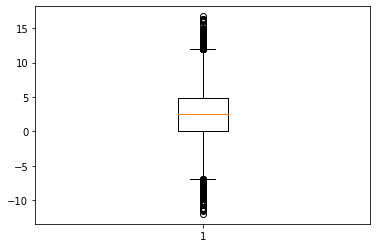

'Значения столбца'

'product'

'гистограмма'

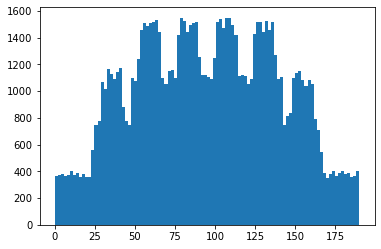

'боксплот'

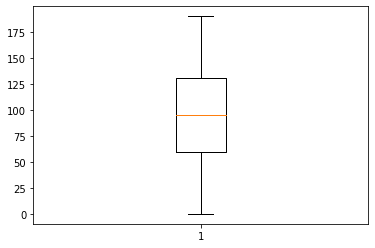

In [171]:
hist(df_2, 100)

In [172]:
corr(df_2)

'зависимость между product и f0'

-0.0019870619990491477

'зависимость между product и f1'

-0.0010123938161308841

'зависимость между product и f2'

0.4458710915574212

'зависимость между product и product'

0.9999999999999999

Геоданные из региона 'geo_data_2'


Распределения нормальны, выбросы есть во всех значениях столбцов, кроме product (в пределах нормы)

Значение зависимости выше 0,5 не подмимается. Следовательно зависимость слабая или очень слабая.

[Home](#Оглавление)

<a name="Шаг_2"></a>

# 2. Обучение и проверка модели

####  model 0

In [173]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

In [174]:
model_0 = LinearRegression()

In [175]:
model_0.fit(features_train_0, target_train_0)

LinearRegression()

In [176]:
predict_0 = model_0.predict(features_valid_0)

In [177]:
mean_squared_error(target_valid_0, predict_0)  ** 0.5

37.5794217150813

In [178]:
predict_0.mean()

92.59256778438035

In [179]:
features_valid_0 = features_valid_0.dropna()

In [180]:
features_valid_0['target'] = target_valid_0

In [181]:
features_valid_0['predict'] = predict_0

Проверил. с Общим df совпадает

Разбил, обучил, проверил 

####  model 1

In [182]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [183]:
model_1 = LinearRegression()

In [184]:
model_1.fit(features_train_1, target_train_1)

LinearRegression()

In [185]:
predict_1 = model_1.predict(features_valid_1)

In [186]:
predict_1.mean()

68.728546895446

In [187]:
mean_squared_error(target_valid_1, predict_1)  ** 0.5

0.8930992867756157

In [188]:
features_valid_1 = features_valid_1.dropna()

In [189]:
features_valid_1['target'] = target_valid_1

In [190]:
features_valid_1['predict'] = predict_1

Разбил, обучил, проверил

####  model 2

In [191]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [192]:
model_2 = LinearRegression()

In [193]:
model_2.fit(features_train_2, target_train_2)

LinearRegression()

In [194]:
predict_2 = model_2.predict(features_valid_2)

In [195]:
predict_2.mean()

94.96504596800489

In [196]:
mean_squared_error(target_valid_2, predict_2) ** 0.5

40.02970873393434

In [197]:
features_valid_2 = features_valid_2.dropna()

In [198]:
features_valid_2['target'] = target_valid_2

In [199]:
features_valid_2['predict'] = predict_2

Разбил, обучил, проверил

In [200]:
column = ['geo_data', 'predict_mean_oil']

In [201]:
df = [
    ['geo_data_0', '92.59'],
    ['geo_data_1', '68.73'],
    ['geo_data_2', '94.97']
     ]

In [202]:
df_geo = pd.DataFrame(data = df, columns = column)

In [203]:
df_geo

,geo_data,predict_mean_oil
0,geo_data_0,92.59
1,geo_data_1,68.73
2,geo_data_2,94.97


Было обучено три модели по разным данным геолокации.
Проведено обучение. Предсказания и проверочные значения были добавлены в валидационную выборку.
по результатам прдсказаний стоит отметить, что среднее предсказанное значение наибольшее у geo_data_2

[Home](#Оглавление)

<a name="Шаг_3"></a>

# 3. Подготовка к расчёту прибыли

In [204]:
product_all = 10000000000 / 450000 / 200

In [205]:
product_all

111.11111111111111

не ниже 111 тыс. баррелей

In [206]:
difference_0 = product_all - df_0['product'].mean()

In [207]:
df_0['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [208]:
difference_0

18.611111111111356

In [209]:
difference_1 = product_all - df_1['product'].mean()

In [210]:
df_1['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [211]:
difference_1

42.2861111110855

In [212]:
difference_2 = product_all - df_2['product'].mean()

In [213]:
df_2['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

In [214]:
difference_2

16.111111111110702

Вывод
Для безубыточной разработки скважины достаточный объем не менее 111.111 тысяч барелей. Наименьшая разница между средним объемом в регионе и необходимом количестве 'geo_data_2'

In [215]:
difference_data = ['18.61', '42.29', '16.11']

In [216]:
difference_data= pd.Series(difference_data)

In [217]:
df_geo['difference_oil'] = difference_data

In [218]:
df_geo

,geo_data,predict_mean_oil,difference_oil
0,geo_data_0,92.59,18.61
1,geo_data_1,68.73,42.29
2,geo_data_2,94.97,16.11


Для наглядности

[Home](#Оглавление)

<a name="Шаг_4"></a>

# 4. Расчёт прибыли и рисков 

Стоимость одной скважины составляет 50 млн.

In [219]:
state = np.random.RandomState(12345)

In [220]:
def revenue(target, predict, count):
    predict_sort = predict.sort_values(ascending = False)
    select = target[predict_sort.index][:count]
    return (select.sum() * 450000 / 1000000000) - 10



Прибыль в млрд


Функция для суммы

In [221]:
def sample(target, predict, count):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, count))
    return pd.Series(values)

Bootstrap 

In [222]:
rev_val_0 = revenue(features_valid_0['target'], features_valid_0['predict'], 200)

In [223]:
rev_val_1 = revenue(features_valid_1['target'], features_valid_1['predict'], 200)

In [224]:
rev_val_2 = revenue(features_valid_2['target'], features_valid_2['predict'], 200)

In [225]:
revenue_valid = [rev_val_0, rev_val_1, rev_val_2]

In [226]:
revenue_valid = pd.Series(revenue_valid)

In [227]:
df_geo['revenue_valid'] = revenue_valid

In [228]:
df_geo

,geo_data,predict_mean_oil,difference_oil,revenue_valid
0,geo_data_0,92.59,18.61,3.320826
1,geo_data_1,68.73,42.29,2.415087
2,geo_data_2,94.97,16.11,2.710350


Рассмотрим далее на несеолькох выборках (Bootstrap)

In [229]:
region_0 = sample(features_valid_0['target'], features_valid_0['predict'], 200)

In [230]:
region_0.mean()

0.4259385269105922

In [231]:
risk_0 = region_0[region_0 < 0].count() / region_0.count() * 100

In [232]:
lower_0 = region_0.quantile(0.025)

In [233]:
upper_0 = region_0.quantile(0.975)

Риск возникновения отрицательной прибыли достаточно высок (больше 2,5 %)

In [234]:
region_1 = sample(features_valid_1['target'], features_valid_1['predict'], 200)

In [235]:
region_1.mean()

0.5182594936973253

In [236]:
risk_1 = region_1[region_1 < 0].count() / region_1.count() * 100

Риск возникновения отрицательной прибыли достаточно низок (менее 2,5 %)

In [237]:
lower_1 = region_1.quantile(0.025)

In [238]:
upper_1 = region_1.quantile(0.975)

In [239]:
region_2 = sample(features_valid_2['target'], features_valid_2['predict'], 200)

In [240]:
region_2.mean()

0.4201940053440498

In [241]:
risk_2 = region_2[region_2 < 0].count() / region_2.count() * 100

In [242]:
lower_2 = region_2.quantile(0.025)

In [243]:
upper_2 = region_2.quantile(0.975)

In [244]:
revenue_bootstrap_mean = [region_0.mean(), region_1.mean(), region_2.mean()]

In [245]:
revenue_bootstrap_mean = pd.Series(revenue_bootstrap_mean)

In [246]:
risk = [risk_0, risk_1, risk_2]

In [247]:
risk = pd.Series(risk)

In [248]:
interval_min = [lower_0, lower_1, lower_2]

In [249]:
interval_max = [upper_0, upper_1, upper_2]

In [250]:
interval_min = pd.Series(interval_min)

In [251]:
interval_min

0   -0.102090
1    0.128123
2   -0.115853
dtype: float64

In [252]:
interval_max = pd.Series(interval_max)

In [253]:
interval_max

0    0.947976
1    0.953613
2    0.989630
dtype: float64

In [254]:
df_geo['revenue_bootstrap_mean'] = revenue_bootstrap_mean

In [258]:
df_geo['interval_min'] = interval_min

In [259]:
df_geo['interval_max'] = interval_max

In [262]:
df_geo['risk'] = risk

In [263]:
df_geo

,geo_data,predict_mean_oil,difference_oil,revenue_valid,revenue_bootstrap_mean,interval_min,interval_max,risk
0,geo_data_0,92.59,18.61,3.320826,0.425939,-0.102090,0.947976,6.0
1,geo_data_1,68.73,42.29,2.415087,0.518259,0.128123,0.953613,0.3
2,geo_data_2,94.97,16.11,2.710350,0.420194,-0.115853,0.989630,6.2


#### Вывод

В результате рассмотрения вопроса на большом количестве выборок.
Следуте утверждать, что лучшим регионом для разработки является регион "geo_data_1.csv"

P.s. Что интеесно ранее регион "geo_data_1.csv" не заявлял себя как выгодный. Получается этот регион хорош тем, что у него наименьший риск уйти в отрицательные прибыли.

In [264]:
df_geo_conclusion = df_geo[['geo_data', 'revenue_bootstrap_mean', 'interval_min', 'interval_max', 'risk']]

In [265]:
df_geo_conclusion.sort_values(by='risk')

,geo_data,revenue_bootstrap_mean,interval_min,interval_max,risk
1,geo_data_1,0.518259,0.128123,0.953613,0.3
0,geo_data_0,0.425939,-0.102090,0.947976,6.0
2,geo_data_2,0.420194,-0.115853,0.989630,6.2


По даннын региона geo_data_1 риск отирцательной прибыли минимален. Доверительный интевал не уходит в отрицательные значения. Средняя прибыль составлят 0,52 млрд рублей.

In [266]:
df_geo

,geo_data,predict_mean_oil,difference_oil,revenue_valid,revenue_bootstrap_mean,interval_min,interval_max,risk
0,geo_data_0,92.59,18.61,3.320826,0.425939,-0.102090,0.947976,6.0
1,geo_data_1,68.73,42.29,2.415087,0.518259,0.128123,0.953613,0.3
2,geo_data_2,94.97,16.11,2.710350,0.420194,-0.115853,0.989630,6.2


Общая таблица

Если рассматривать общую таблицу, стоит отметить регион geo_data_2. Он имеет наименьшее значение, которое необходимо для преодоления порога в 111 тыс барель. (рентабельное значение). Но к сожалению при этом имеет максимальный риск понести убытки.

[Home](#Оглавление)